In [2]:
import pandas as pd
import numpy as py
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression

In [3]:
mini = pd.read_csv("C:/Users/Harish/Desktop/harii/loandata.csv")
mini.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
mini.shape

(614, 13)

In [5]:
mini.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [6]:
mini.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [7]:
mini1 = mini.dropna()

In [8]:
mini1.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [9]:
mini1

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [10]:
mini1['Dependents'].value_counts()

0     274
2      85
1      80
3+     41
Name: Dependents, dtype: int64

In [11]:
mini2 = mini1.replace(to_replace = '3+' , value = 3)

In [12]:
mini2

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [13]:
mini2.drop('Loan_ID', axis = 1, inplace = True)

In [14]:
mini2

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...
609,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,Male,Yes,3,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


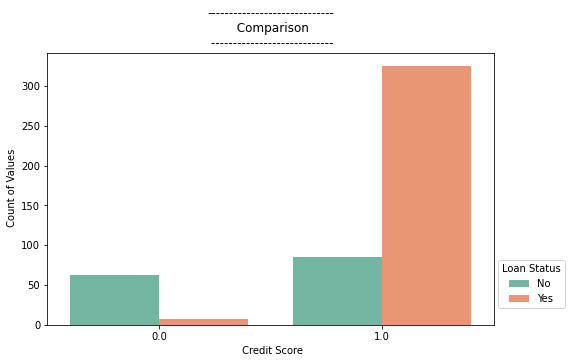

In [15]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8,5))
sns.countplot(x='Credit_History', data=mini2, hue='Loan_Status', palette= 'Set2' )
plt.title("-----------------------------\n  Comparison \n ----------------------------")
plt.xlabel(" Credit Score")
plt.ylabel( " Count of Values")
plt.legend(bbox_to_anchor=(1.17, 0.15), title ='Loan Status', loc='right',labels=['No','Yes'])

<Figure size 576x576 with 0 Axes>

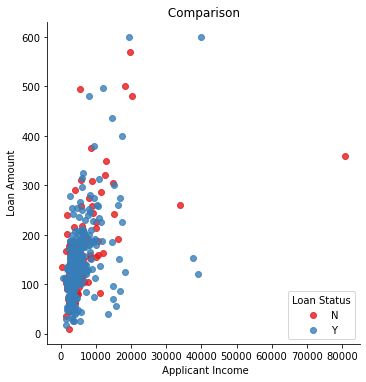

In [16]:
plt.figure(figsize=(8,8))
sns.lmplot(x = 'ApplicantIncome', y = 'LoanAmount', data = mini2, fit_reg = False, hue= 'Loan_Status' ,legend=False, palette = 'Set1')
plt.title(" Comparison ")
plt.xlabel(" Applicant Income")
plt.ylabel(" Loan Amount")
plt.legend( title ='Loan Status', loc='lower right')

C:\Users\Harish\anaconda3\lib\site-packages\seaborn\distributions.py:1657: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.1 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)
C:\Users\Harish\anaconda3\lib\site-packages\seaborn\distributions.py:1657: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.1 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)
C:\Users\Harish\anaconda3\lib\site-packages\seaborn\distributions.py:1657: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.1 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)
C:\Users\Harish\anaconda3\lib\site-packages\seaborn\distributions.py:1657: FutureWarning: The `bw` parameter is 

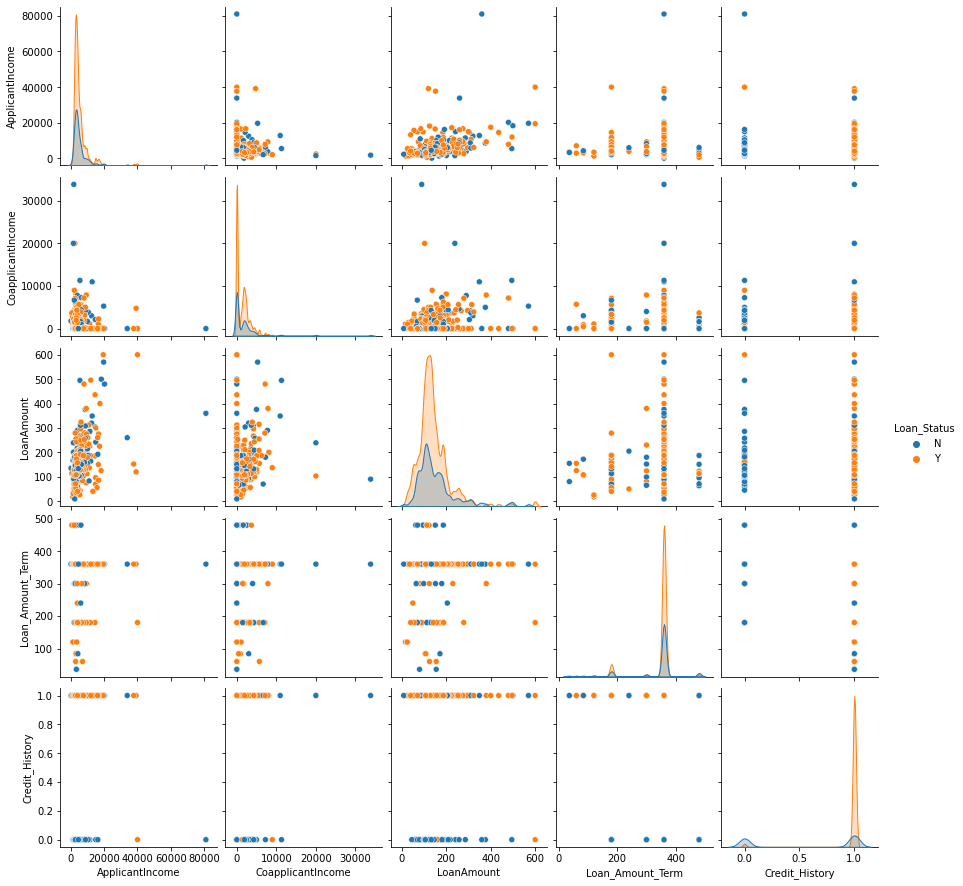

In [17]:
import matplotlib.pyplot as plt
sns.pairplot(mini2 ,kind = "scatter", hue = "Loan_Status", diag_kws = {'bw':0.1})
plt.show()

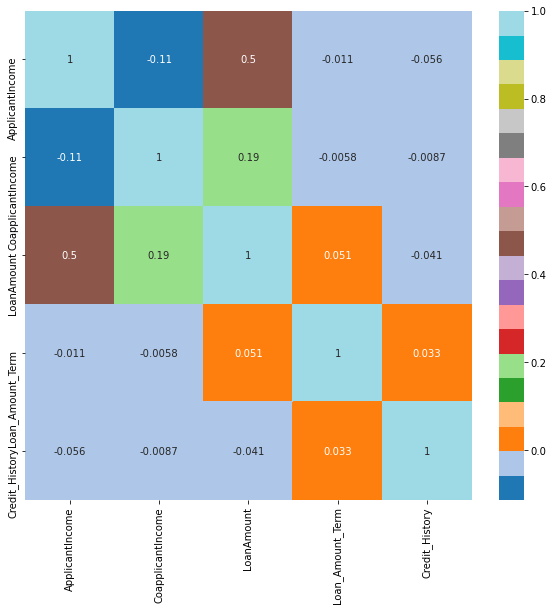

In [18]:
plt.figure(figsize=(10,9))
cmap="tab20"
center=0
annot=True
a = mini2.corr()
sns.heatmap(a, cmap=cmap,annot=annot)
plt.show()

<AxesSubplot:xlabel='Loan_Status', ylabel='LoanAmount'>

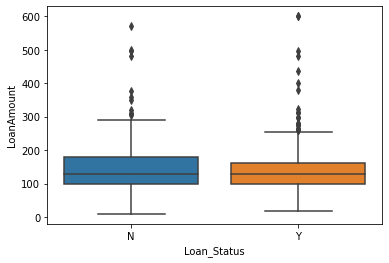

In [19]:
sns.boxplot(x = mini2['Loan_Status'], y = mini2['LoanAmount'])

<AxesSubplot:xlabel='Self_Employed', ylabel='LoanAmount'>

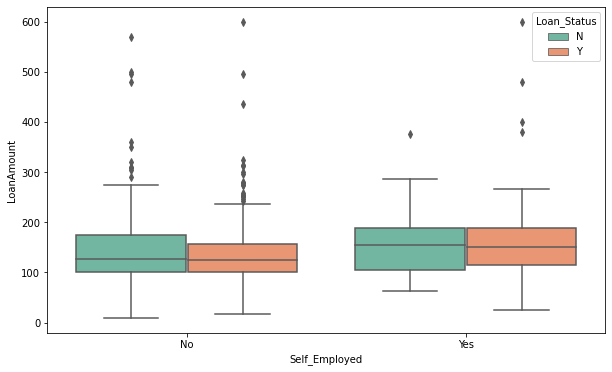

In [20]:
plt.figure(figsize=(10,6))
sns.boxplot(x="Self_Employed",y=mini2["LoanAmount"], hue="Loan_Status", data=mini2 , palette ='Set2')

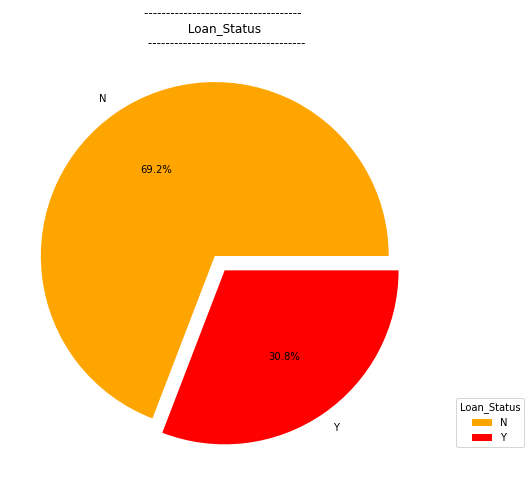

In [21]:
import numpy as np

plt.figure(figsize=(13,8))
size=mini2['Loan_Status'].value_counts()
labels=np.unique(mini2.Loan_Status)
color=['orange','r']
explode=(0.1,0)
plt.pie(size, labels = labels,autopct='%1.1f%%',colors=color, explode=explode)
plt.title("------------------------------------ \n Loan_Status \n ------------------------------------")
plt.legend(bbox_to_anchor=(1.02, 0.15), loc='center left' , title ='Loan_Status')


In [22]:
mini2['Dependents'].value_counts()

0    274
2     85
1     80
3     41
Name: Dependents, dtype: int64

In [23]:
mini2.replace({'Gender':{'Male': 1 , 'Female': 0},
                     'Married':{'Yes': 1 , 'No': 0},
                     'Education':{'Graduate': 1 , 'Not Graduate': 0},
                     'Self_Employed':{'Yes': 1, 'No': 0},
                     'Property_Area':{'Rural':0, 'Semiurban': 1, 'Urban':2},
                     'Loan_Status':{'Y': 1, 'N': 0}},inplace = True)

In [24]:
mini2

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,1,1,1,1,0,4583,1508.0,128.0,360.0,1.0,0,0
2,1,1,0,1,1,3000,0.0,66.0,360.0,1.0,2,1
3,1,1,0,0,0,2583,2358.0,120.0,360.0,1.0,2,1
4,1,0,0,1,0,6000,0.0,141.0,360.0,1.0,2,1
5,1,1,2,1,1,5417,4196.0,267.0,360.0,1.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,1,0,2900,0.0,71.0,360.0,1.0,0,1
610,1,1,3,1,0,4106,0.0,40.0,180.0,1.0,0,1
611,1,1,1,1,0,8072,240.0,253.0,360.0,1.0,2,1
612,1,1,2,1,0,7583,0.0,187.0,360.0,1.0,2,1


In [42]:
mini2['ApplicantIncome'].min()


150

In [26]:
X = mini2[['Gender', 'Married', 'ApplicantIncome', 'LoanAmount','Loan_Amount_Term', 'Credit_History','Dependents','Property_Area']]
Y = mini2.Loan_Status
X.shape, Y.shape

((480, 8), (480,))

In [27]:
X

,Gender,Married,ApplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Dependents,Property_Area
1,1,1,4583,128.0,360.0,1.0,1,0
2,1,1,3000,66.0,360.0,1.0,0,2
3,1,1,2583,120.0,360.0,1.0,0,2
4,1,0,6000,141.0,360.0,1.0,0,2
5,1,1,5417,267.0,360.0,1.0,2,2
...,...,...,...,...,...,...,...,...
609,0,0,2900,71.0,360.0,1.0,0,0
610,1,1,4106,40.0,180.0,1.0,3,0
611,1,1,8072,253.0,360.0,1.0,1,2
612,1,1,7583,187.0,360.0,1.0,2,2


In [28]:
Y

1      0
2      1
3      1
4      1
5      1
      ..
609    1
610    1
611    1
612    1
613    0
Name: Loan_Status, Length: 480, dtype: int64

In [29]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size = 0.2, random_state = 2)

In [30]:
X.shape, X_train.shape,X_test.shape,Y.shape

((480, 8), (384, 8), (96, 8), (480,))

In [31]:
from sklearn.ensemble import RandomForestClassifier 
model1 = RandomForestClassifier(max_depth = 10, random_state = 10) 
model1.fit(X_train, Y_train)

RandomForestClassifier(max_depth=10, random_state=10)

In [32]:
train_predict = model1.predict(X_train)

In [33]:
test_predict = model1.predict(X_test)

In [34]:
from sklearn import metrics
r2_train = metrics.r2_score(Y_train, train_predict)
print('R squared value of Train Data: ', r2_train)

R squared value of Train Data:  0.7085437085437085


In [35]:
r2_test = metrics.r2_score(Y_test, test_predict)
print('R squared value of Train Data: ', r2_test)

R squared value of Train Data:  0.16445258818140185


In [36]:
input_data=  (1,1,2583,120.0,360.0,1.0,0,2)     
# Coverting into data to numpy array so as to avoid reshape error :
input_data_as_numpy_array = np.asarray(input_data)

# Reshapping the array :
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

# Interpreting the Predicted Result :
result = model1.predict(input_data_reshaped)
result

array([1], dtype=int64)

In [37]:
accuracy = model1.score (X_test, Y_test) #test prediction
print(accuracy * 100, '%')

80.20833333333334 %


In [38]:
pred_train = model1.predict(X_train)  #train prediction
accuracy_score(Y_train,pred_train) 

0.9401041666666666

In [40]:
import pickle
pickle.dump(model1,open('har.pkl','wb')) 